You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.
Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.
Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.
Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.
Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.
Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.
Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data={'Number of Pregnancy':np.random.randint(0, 10, size=100),
      'Glucose level':np.random.randint(70,200,size=100),
      'Blood Pressure':np.random.randint(80,200,size=100),
      'Skin Thickness':np.random.randint(10,50,size=100),
      'Insulin':np.random.randint(2,30,size=100),
      'BMI':np.random.uniform(18.5, 40, size=100),
      'Diabetes Pedigree Function': np.random.uniform(0.1, 2, size=100), 
      'AGE':np.random.randint(20, 80, size=100),
      'Presence of Diabetes': np.random.choice([0, 1], size=100)  }

In [7]:
dataset=pd.DataFrame(data)
dataset.head()

,Number of Pregnancy,Glucose level,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,AGE,Presence of Diabetes
0,8,177,108,12,7,30.943951,0.771995,36,1
1,3,111,83,41,20,36.818930,1.740883,54,1
2,4,139,97,15,16,37.250800,1.594034,54,1
3,2,182,124,24,14,32.227967,1.984218,51,1
4,1,184,184,34,28,18.923018,0.527048,44,1


In [11]:
dataset.describe()

,Number of Pregnancy,Glucose level,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,AGE,Presence of Diabetes
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,4.650000,134.590000,134.430000,29.730000,15.070000,29.166654,1.057596,49.54000,0.580000
std,3.006307,42.249164,36.082469,12.303284,8.036853,6.403431,0.513775,17.99743,0.496045
min,0.000000,70.000000,80.000000,10.000000,2.000000,18.923018,0.103018,20.00000,0.000000
25%,2.000000,95.000000,102.750000,18.000000,9.000000,23.777931,0.674642,34.25000,0.000000
50%,5.000000,131.500000,126.500000,30.500000,14.500000,29.639644,1.067642,49.50000,1.000000
75%,7.250000,175.500000,166.250000,41.000000,22.000000,34.585091,1.542156,66.00000,1.000000
max,9.000000,199.000000,199.000000,49.000000,29.000000,39.846963,1.984218,79.00000,1.000000


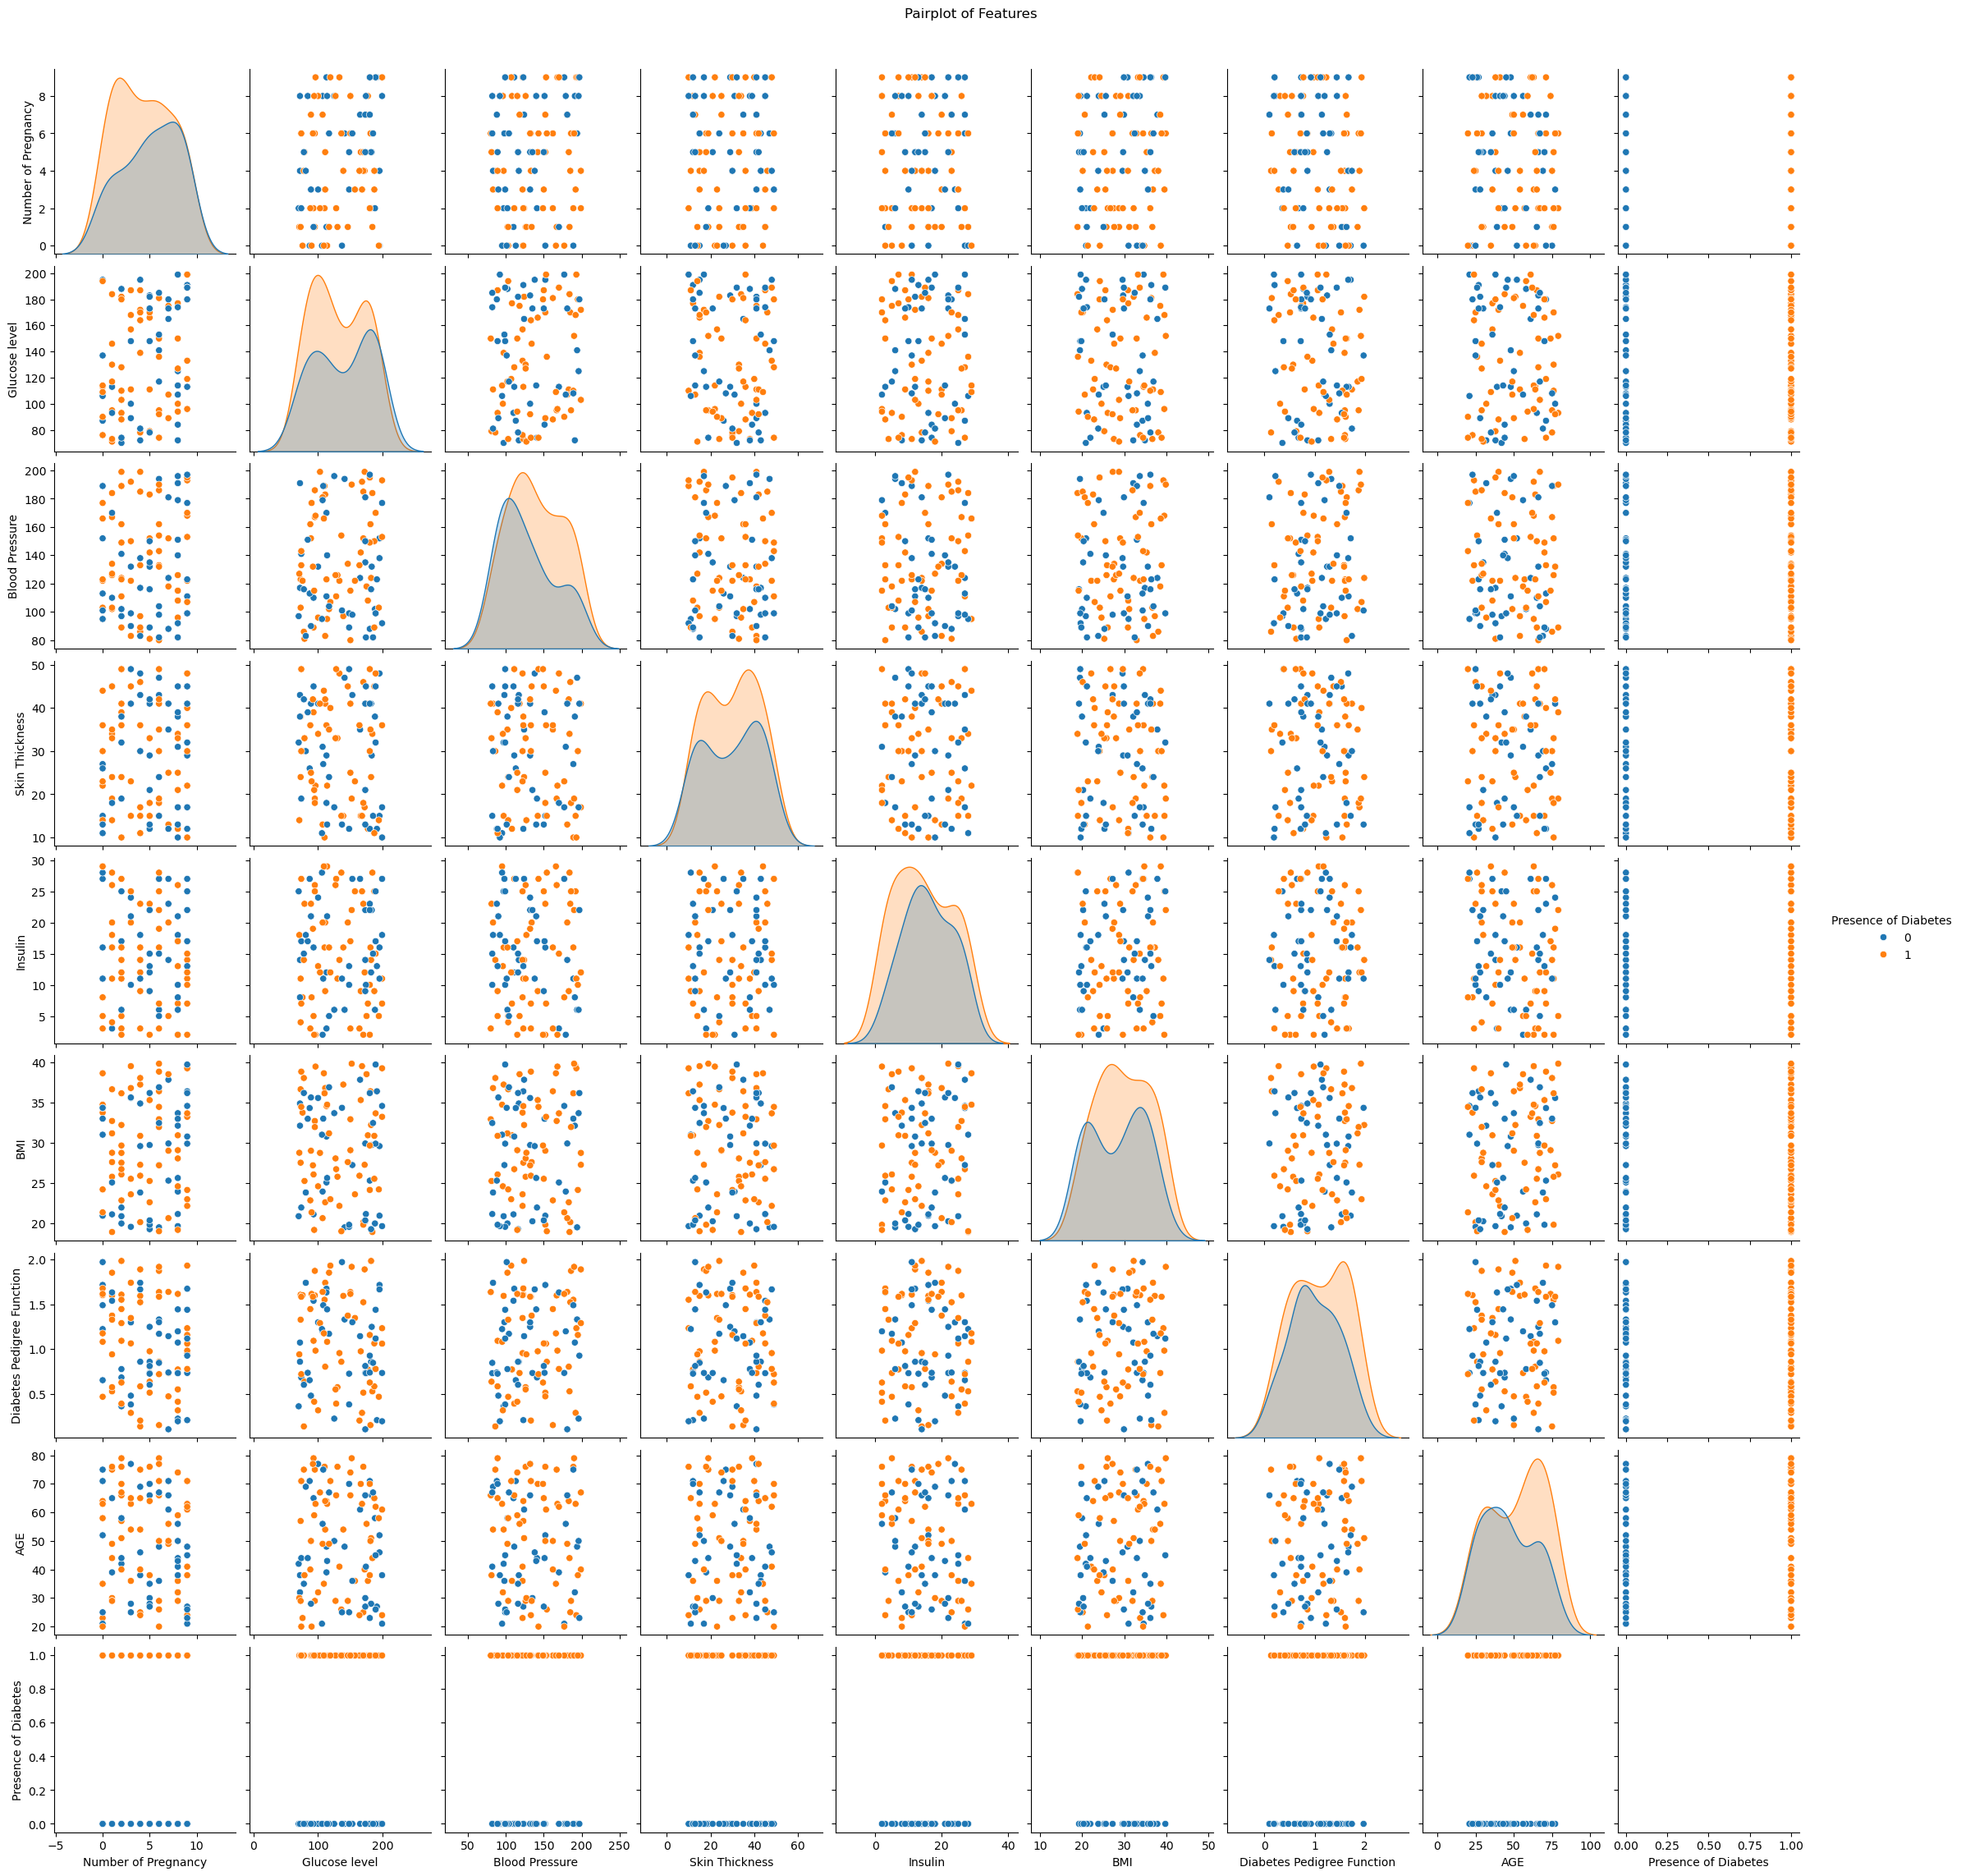

In [14]:
sns.pairplot(dataset, vars=dataset.columns, hue='Presence of Diabetes')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [16]:
dataset.isnull().sum()

Number of Pregnancy           0
Glucose level                 0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
AGE                           0
Presence of Diabetes          0
dtype: int64

In [18]:
dataset.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=dataset.drop('Presence of Diabetes',axis=1)
y=dataset['Presence of Diabetes']
scaler=StandardScaler()
scaledvalue=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(scaledvalue,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'max_depth': 10, 'min_samples_split': 2}


Accuracy: 0.6
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1 Score: 0.7142857142857143
Confusion Matrix:
 [[ 2  4]
 [ 4 10]]


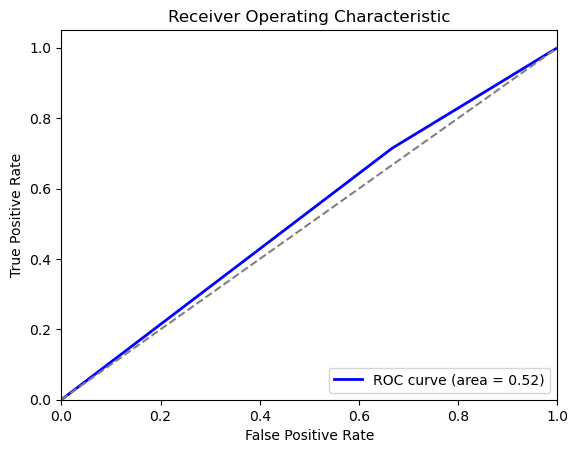

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Predict on test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, grid_search.best_estimator_.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


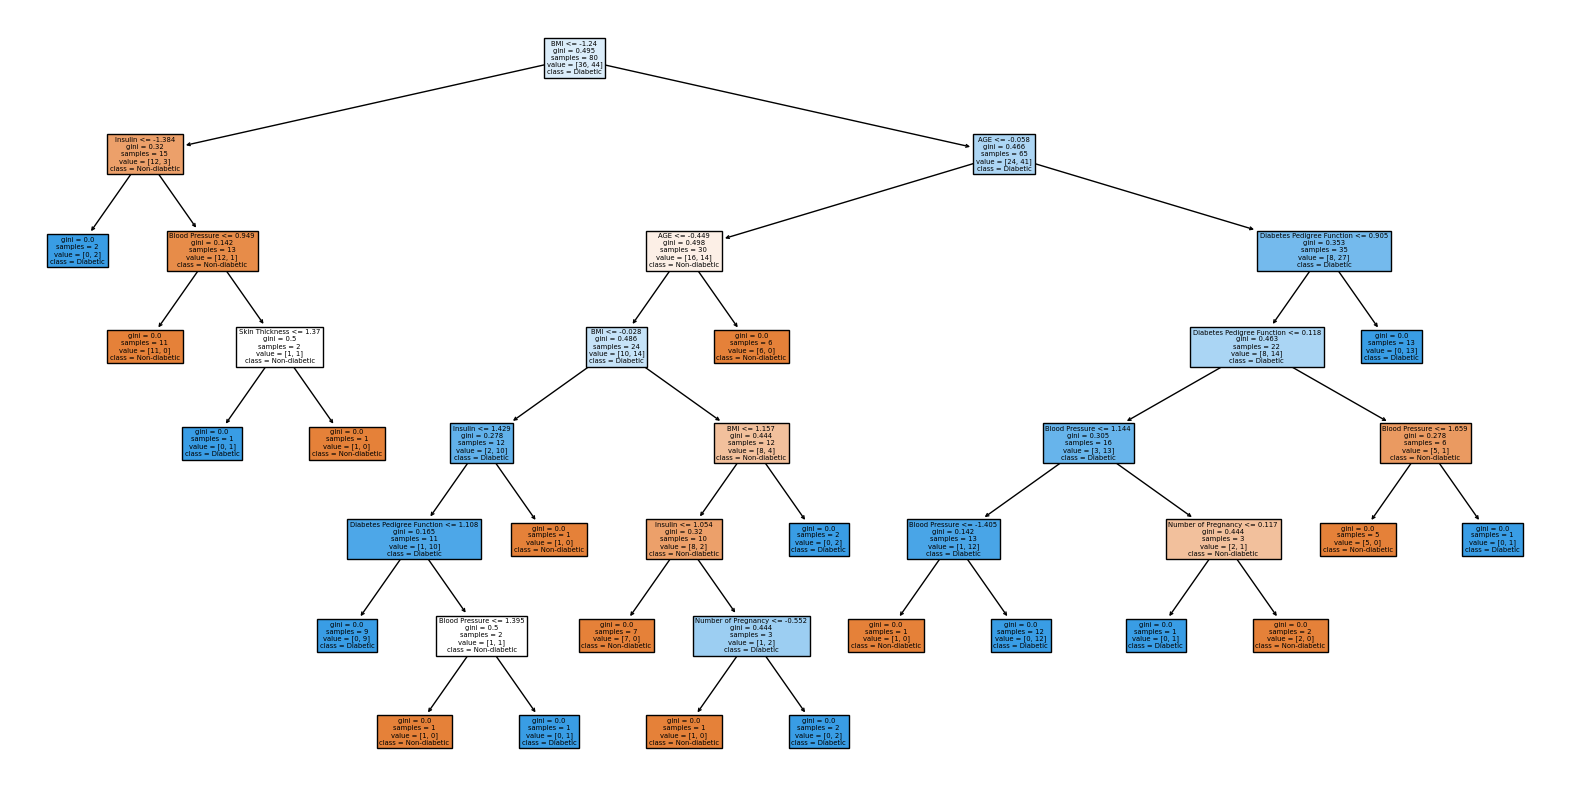

In [36]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_, feature_names=X.columns, class_names=['Non-diabetic', 'Diabetic'], filled=True)
plt.show()


In [38]:
# Sensitivity Analysis: Test robustness by varying the hyperparameters
param_ranges = {'max_depth': [5, 15, 25], 'min_samples_split': [2, 10, 20]}
for depth in param_ranges['max_depth']:
    for min_split in param_ranges['min_samples_split']:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_split)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        print(f"Depth: {depth}, Min Split: {min_split}")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("F1 Score:", f1_score(y_test, y_pred))


Depth: 5, Min Split: 2
Accuracy: 0.55
F1 Score: 0.64
Depth: 5, Min Split: 10
Accuracy: 0.55
F1 Score: 0.64
Depth: 5, Min Split: 20
Accuracy: 0.55
F1 Score: 0.64
Depth: 15, Min Split: 2
Accuracy: 0.55
F1 Score: 0.6666666666666666
Depth: 15, Min Split: 10
Accuracy: 0.5
F1 Score: 0.6153846153846154
Depth: 15, Min Split: 20
Accuracy: 0.55
F1 Score: 0.64
Depth: 25, Min Split: 2
Accuracy: 0.6
F1 Score: 0.7142857142857143
Depth: 25, Min Split: 10
Accuracy: 0.5
F1 Score: 0.6153846153846154
Depth: 25, Min Split: 20
Accuracy: 0.55
F1 Score: 0.64
